In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

x_offset=y_offset=50

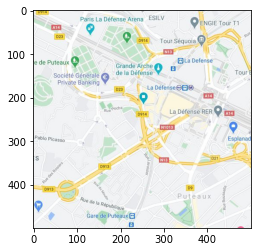

In [2]:
map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(map_image)

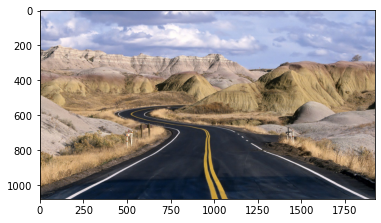

In [3]:
frame = cv2.cvtColor(cv2.imread('../data/input_image_road.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

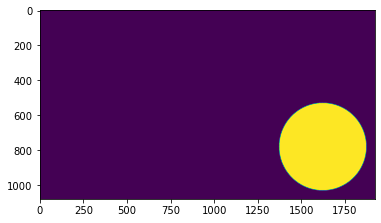

In [4]:
mask = np.zeros(frame.shape[:2], dtype="uint8")
cv2.circle(mask, (frame.shape[1] - int(map_image.shape[0]/2) - x_offset, frame.shape[0] - int(map_image.shape[1]/2) - y_offset),
           int(map_image.shape[0]/2), 255, -1)
plt.imshow(mask)

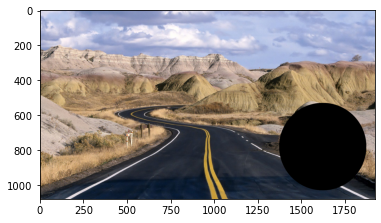

In [5]:
mask_inv = cv2.bitwise_not(mask)
frame_masked = cv2.bitwise_and(frame,frame,mask = mask_inv)
plt.imshow(frame_masked)

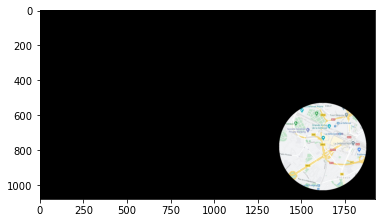

In [6]:
frame[frame.shape[0] - map_image.shape[0] - y_offset : frame.shape[0] - y_offset,
      frame.shape[1] - map_image.shape[1] - x_offset : frame.shape[1] - x_offset] = map_image
map_masked = cv2.bitwise_and(frame,frame,mask = mask)
plt.imshow(map_masked)

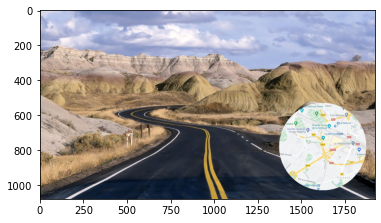

In [7]:
rows,cols,channels = frame.shape
dst = cv2.add(frame_masked,map_masked)
frame[0:rows, 0:cols ] = dst
plt.imshow(dst)

 lat: 10, lon :15
03/31/2021, 20:47:09,  lat: 10, lon :15


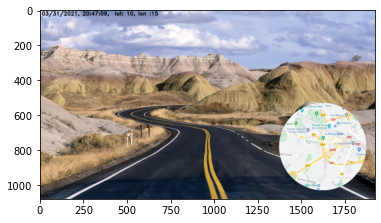

In [8]:
from datetime import datetime
date = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
lat = 10;
lon = 15;
localisation = " lat: " + str(lat) + ", " + "lon :" + str(lon)
print(localisation)
text = date + ", " + localisation
print(text)
cv2.putText(frame,text,(10,30), cv2.FONT_HERSHEY_DUPLEX, 1,(0,0,0),2,cv2.LINE_AA)
plt.imshow(frame)